This notebook is a daily assignment for DAT 350. The goal is to explore classification with the iris data set.

1. Importing pandas, matplotlib.pyplot, and the iris dataset.

In [20]:
# import the iris data set
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

2. Load in the data set.

In [11]:
# load in the data set
xDF, yDF = load_iris(return_X_y=True,as_frame=True)

# create list for the column names
colNames = ['sepal_length','sepal_width','petal_length','petal_width']

# assign the column names to the columns xDF
xDF.columns = colNames

3. Print out heads and tails of both dataframes.

In [15]:
print(xDF.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [16]:
print(yDF.head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [17]:
print(xDF.tail())

     sepal_length  sepal_width  petal_length  petal_width
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8


In [18]:
print(yDF.tail())

145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int64


4. Describe the x dataframe.

In [19]:
# gives summary statistics of the iris features
xDF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


5. Make a histogram for each feature

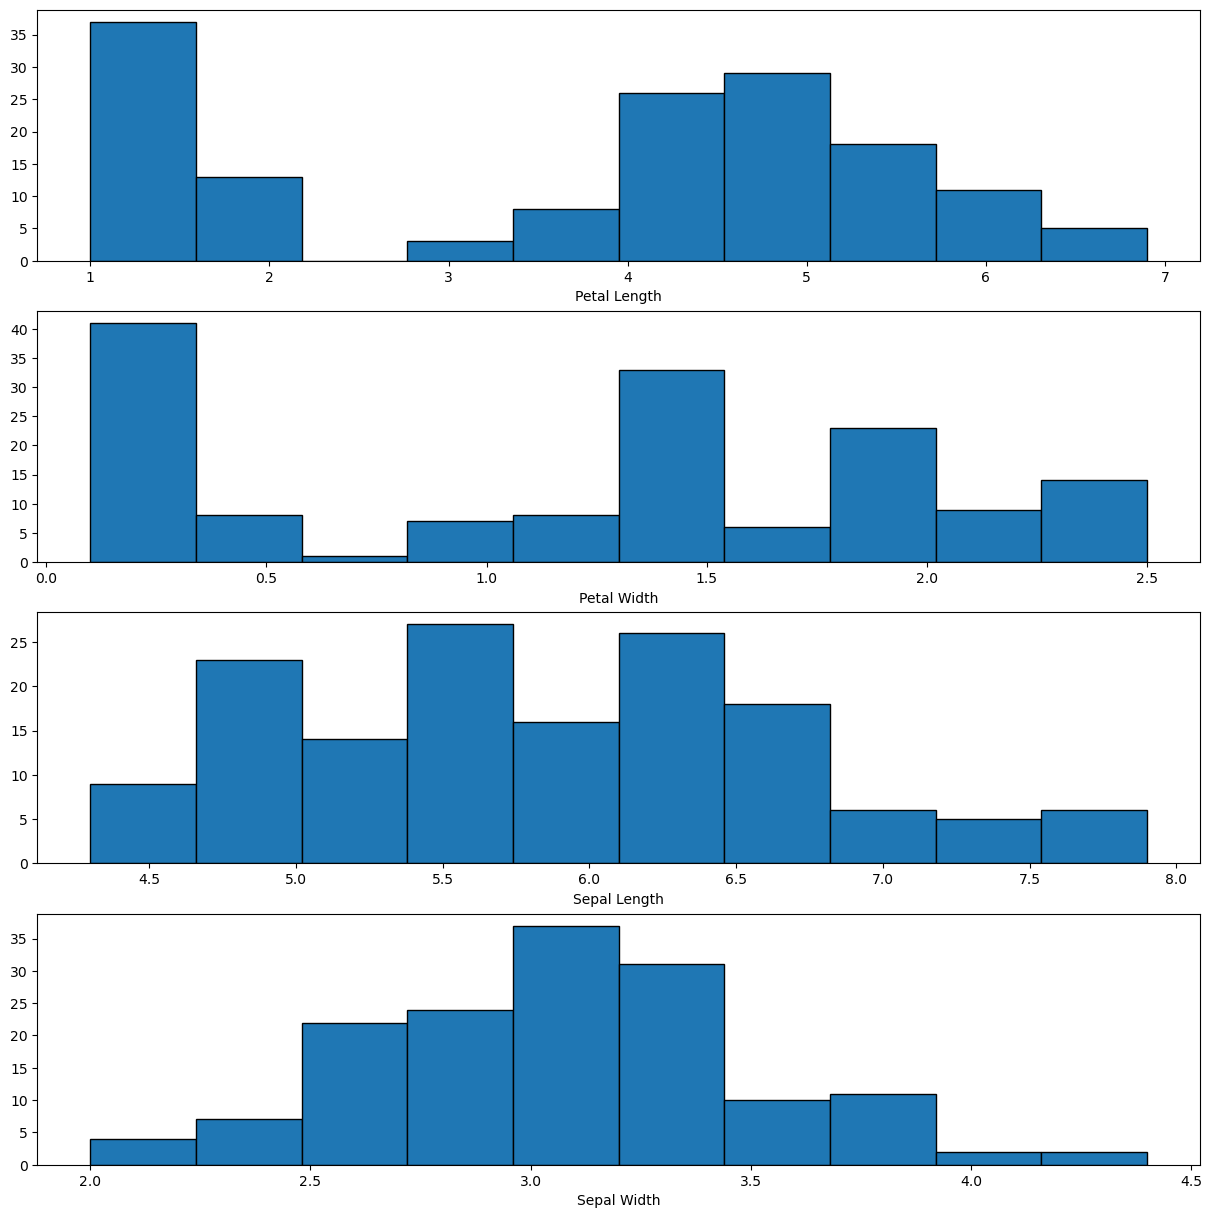

In [31]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,figsize=(15,15))

axs1.hist(xDF['petal_length'],edgecolor='black')
axs1.set_xlabel('Petal Length')

axs2.hist(xDF['petal_width'],edgecolor='black')
axs2.set_xlabel('Petal Width')

axs3.hist(xDF['sepal_length'],edgecolor='black')
axs3.set_xlabel('Sepal Length')

axs4.hist(xDF['sepal_width'],edgecolor='black')
axs4.set_xlabel('Sepal Width')

plt.show()

6. Are there any correlations between the features.

In [32]:
xDF.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


- There is a strong positive correlation between sepal_length and the two features petal_length and petal_width.
- There is a strong positive correlation between petal_length and the two features sepal_length and petal_width.
- There is a strong positive correlation between petal_width and the two features sepal_length and petal_length.

7. Split the data set into a training set and a testing set.

In [34]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(xDF,yDF,test_size=0.3)

8. print heads of X_train and y_train

In [35]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
108,6.7,2.5,5.8,1.8
55,5.7,2.8,4.5,1.3
70,5.9,3.2,4.8,1.8
85,6.0,3.4,4.5,1.6
84,5.4,3.0,4.5,1.5


In [36]:
y_train.head()

108    2
55     1
70     1
85     1
84     1
Name: target, dtype: int64

9 & 10. Train and test logistic regression model. Print the accuracy score.

In [51]:
# import logistic regression and accuracy_score function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression().fit(X_train,y_train)

preds = model.predict(X_test)

accuracy_score(y_test,preds)

0.9777777777777777

11. Train and evaluate Support Vector Machine, Neural Network, Decison Tree.

In [45]:
# import Support Vector Classifier
from sklearn.svm import SVC

# train the model
model = SVC().fit(X_train,y_train)

# make predictions
preds = model.predict(X_test)

# compate true and predicted values
accuracy_score(y_test,preds)

0.9555555555555556

In [47]:
# import Neural Network
from sklearn.neural_network import MLPClassifier

# train the model
model = MLPClassifier().fit(X_train,y_train)

# make predictions
preds = model.predict(X_test)

# compare true and predicted values
accuracy_score(y_test,preds)

/Users/bretttracy/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

In [49]:
# import Decision Tree
from sklearn.tree import DecisionTreeClassifier

# train the model
model = DecisionTreeClassifier().fit(X_train,y_train)

# make predictions
preds = model.predict(X_test)

# compare true and predicted values
accuracy_score(y_test,preds)

0.9777777777777777

12. What was the accuracy of each model?

- Logistic Regression Accuracy: 0.98
- Support Vector Classifier: 0.96
- Multi-layer Perceptron: 1.0
- Decision Tree: 0.98